### Zomato dataset Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.use("dark_background")

#### Read CSV File

In [2]:
df = pd.read_csv("D:/Data Analyst/Data Analyst_Stydy Materials/Zomato dataset/zomato.csv")

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [7]:
df.describe(include = 'object')

,url,address,name,online_order,book_table,rate,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/jalsa-banasha...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,216,5124,19132,182,2913,7576,7595,39617,25942,3279


### Drop Unnecessary Colums

In [8]:
df = df.drop(['url','address','phone'], axis = 1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   dish_liked                   23639 non-null  object
 8   cuisines                     51672 non-null  object
 9   approx_cost(for two people)  51371 non-null  object
 10  reviews_list                 51717 non-null  object
 11  menu_item                    51717 non-null  object
 12  listed_in(type)              51717 non-null  object
 13  listed_in(city)              51

### Rename the Columns

In [10]:
df.rename(columns = {'approx_cost(for two people)' : 'cost','listed_in(type)': 'Type'}, inplace = 'True')
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Dropping Duplicate

In [11]:
df.duplicated().sum()

63

In [12]:
df.drop_duplicates(inplace = True)
df.shape

(51654, 14)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51654 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             51654 non-null  object
 1   online_order     51654 non-null  object
 2   book_table       51654 non-null  object
 3   rate             43894 non-null  object
 4   votes            51654 non-null  int64 
 5   location         51633 non-null  object
 6   rest_type        51427 non-null  object
 7   dish_liked       23627 non-null  object
 8   cuisines         51609 non-null  object
 9   cost             51309 non-null  object
 10  reviews_list     51654 non-null  object
 11  menu_item        51654 non-null  object
 12  Type             51654 non-null  object
 13  listed_in(city)  51654 non-null  object
dtypes: int64(1), object(13)
memory usage: 5.9+ MB


### Insight:

* The columns namely rate, location, rest_type, dish_liked, cuisines and cost are having null values present.

### Check NULL Value in the Column

In [14]:
df.isnull().sum()

name                   0
online_order           0
book_table             0
rate                7760
votes                  0
location              21
rest_type            227
dish_liked         28027
cuisines              45
cost                 345
reviews_list           0
menu_item              0
Type                   0
listed_in(city)        0
dtype: int64

### Cleaning rate Column

In [15]:
# Checking the unique values
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
df = df[df.rate != 'NEW']
df = df[df.rate != '-']

In [17]:
df.rate = df.rate.astype('str')
df.rate = df.rate.apply(lambda x: x.replace('/5',''))
df.rate = df.rate.astype('float')
df.rate = df.rate.fillna(value = df.rate.mean())

In [18]:
df.rate.unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       2.9       , 3.5       , 3.70051169, 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [19]:
df.shape

(49387, 14)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49387 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             49387 non-null  object 
 1   online_order     49387 non-null  object 
 2   book_table       49387 non-null  object 
 3   rate             49387 non-null  float64
 4   votes            49387 non-null  int64  
 5   location         49366 non-null  object 
 6   rest_type        49162 non-null  object 
 7   dish_liked       23480 non-null  object 
 8   cuisines         49342 non-null  object 
 9   cost             49047 non-null  object 
 10  reviews_list     49387 non-null  object 
 11  menu_item        49387 non-null  object 
 12  Type             49387 non-null  object 
 13  listed_in(city)  49387 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.7+ MB


### Cleaning the cost column (Remove ',' in cost column)

In [21]:
# Checking the unique value in cost column
df.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '80', '50', '190', '1,700', nan, '180', '1,350', '2,200',
       '1,400', '2,000', '1,800', '1,900', '330', '2,500', '2,100',
       '3,000', '2,800', '3,400', '40', '1,250', '3,500', '4,000',
       '2,400', '2,600', '120', '1,450', '469', '70', '3,200', '60',
       '240', '6,000', '1,050', '2,300', '4,100', '5,000', '3,700',
       '1,650', '2,700', '4,500', '140', '360'], dtype=object)

In [22]:
# Changing the cost to string
df.cost = df.cost.astype('str')

# using lambda function to replace ',' from cost
df.cost = df.cost.apply( lambda x: x.replace(',',''))

# Changing the cost to float
df.cost = df.cost.astype('float')

In [23]:
df.cost = df.cost.fillna(value = df.cost.mean())
df.cost

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: cost, Length: 49387, dtype: float64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49387 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             49387 non-null  object 
 1   online_order     49387 non-null  object 
 2   book_table       49387 non-null  object 
 3   rate             49387 non-null  float64
 4   votes            49387 non-null  int64  
 5   location         49366 non-null  object 
 6   rest_type        49162 non-null  object 
 7   dish_liked       23480 non-null  object 
 8   cuisines         49342 non-null  object 
 9   cost             49387 non-null  float64
 10  reviews_list     49387 non-null  object 
 11  menu_item        49387 non-null  object 
 12  Type             49387 non-null  object 
 13  listed_in(city)  49387 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 5.7+ MB


### Cleaning the dish_liked column

In [25]:
# Checking the null value
df.dish_liked.isnull().sum()

25907

In [26]:
# Replacing the null values with 'No Special Dish'
df['dish_liked'] = df['dish_liked'].apply(lambda x: str(x).replace('nan','No Special Dish'))

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49387 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             49387 non-null  object 
 1   online_order     49387 non-null  object 
 2   book_table       49387 non-null  object 
 3   rate             49387 non-null  float64
 4   votes            49387 non-null  int64  
 5   location         49366 non-null  object 
 6   rest_type        49162 non-null  object 
 7   dish_liked       49387 non-null  object 
 8   cuisines         49342 non-null  object 
 9   cost             49387 non-null  float64
 10  reviews_list     49387 non-null  object 
 11  menu_item        49387 non-null  object 
 12  Type             49387 non-null  object 
 13  listed_in(city)  49387 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 5.7+ MB


### Cleaning the location column

In [28]:
# finding the mode value
df.location.mode()[0]

'BTM'

In [29]:
# Fill the mode value in location column
df.location = df.location.fillna(df.location.mode()[0])

In [30]:
df.shape

(49387, 14)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49387 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             49387 non-null  object 
 1   online_order     49387 non-null  object 
 2   book_table       49387 non-null  object 
 3   rate             49387 non-null  float64
 4   votes            49387 non-null  int64  
 5   location         49387 non-null  object 
 6   rest_type        49162 non-null  object 
 7   dish_liked       49387 non-null  object 
 8   cuisines         49342 non-null  object 
 9   cost             49387 non-null  float64
 10  reviews_list     49387 non-null  object 
 11  menu_item        49387 non-null  object 
 12  Type             49387 non-null  object 
 13  listed_in(city)  49387 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 5.7+ MB


### Cleaning the rest_type column

In [32]:
# finding the mode value in rest_types columns
df.rest_type.mode()[0]

'Quick Bites'

In [33]:
# Fill the mode value in location column
df.rest_type = df.rest_type.fillna(df.rest_type.mode()[0])

In [34]:
# Checking the null values in rest_type column
df.rest_type.isnull().sum()

0

### Cleaning the cuisines column

In [35]:
# Checking the null values in rest_type column
df.cuisines.isnull().sum()

45

In [36]:
# finding the mode value in rest_types columns
df.cuisines.mode()[0]

'North Indian'

In [37]:
# Fill the null valve in location column using mode 
df.cuisines = df.cuisines.fillna(df.cuisines.mode()[0])

In [38]:
# Checking the null values in rest_type column
df.cuisines.isnull().sum()

0

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49387 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             49387 non-null  object 
 1   online_order     49387 non-null  object 
 2   book_table       49387 non-null  object 
 3   rate             49387 non-null  float64
 4   votes            49387 non-null  int64  
 5   location         49387 non-null  object 
 6   rest_type        49387 non-null  object 
 7   dish_liked       49387 non-null  object 
 8   cuisines         49387 non-null  object 
 9   cost             49387 non-null  float64
 10  reviews_list     49387 non-null  object 
 11  menu_item        49387 non-null  object 
 12  Type             49387 non-null  object 
 13  listed_in(city)  49387 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 5.7+ MB


In [40]:
df.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


### Data is now clean and Lets jump to visualization

### Finding the number of resturants in different locations of Bangalore using count plot

In [41]:
df['location'].value_counts()[0:20]

BTM                      4802
Koramangala 5th Block    2441
HSR                      2414
JP Nagar                 2103
Whitefield               2032
Indiranagar              1993
Jayanagar                1851
Marathahalli             1786
Bannerghatta Road        1539
Bellandur                1217
Brigade Road             1184
Koramangala 7th Block    1152
Electronic City          1132
Koramangala 1st Block    1124
Koramangala 6th Block    1120
Sarjapur Road            1012
Koramangala 4th Block     994
Ulsoor                    968
MG Road                   893
Banashankari              845
Name: location, dtype: int64

Text(0.5, 0, 'No of Restaurents')

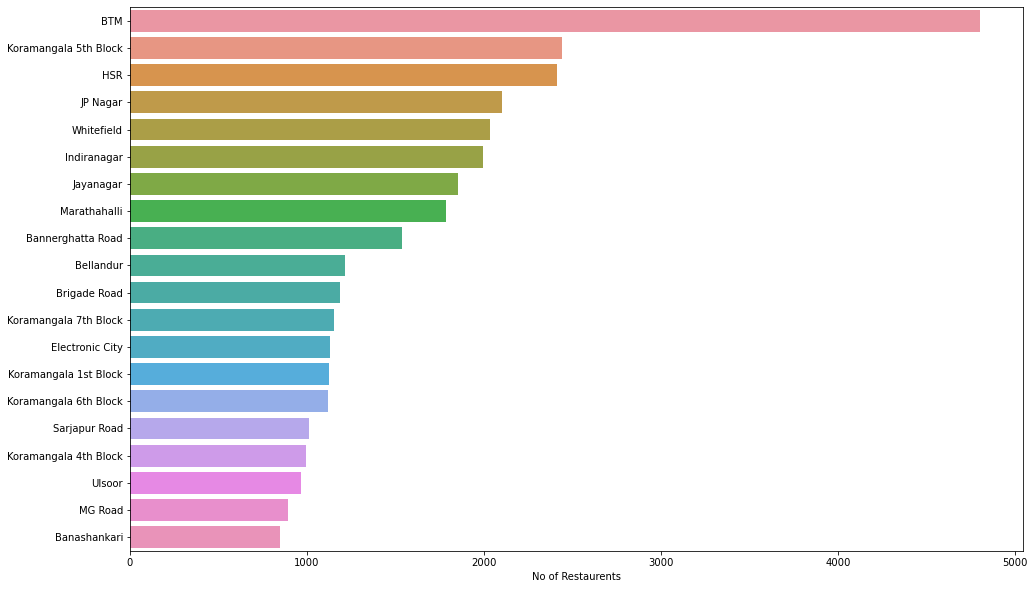

In [42]:
plt.figure(figsize = (16,10))
sns.barplot(y=df['location'].value_counts()[0:20].index,x=df['location'].value_counts()[0:20])
plt.xlabel('No of Restaurents')

### Insight:

* The most no of restaurents are presnets in BTM location and followed by koramangala 5th Block, HSR, JP Nagar and so on.

### Visualizing online order facility

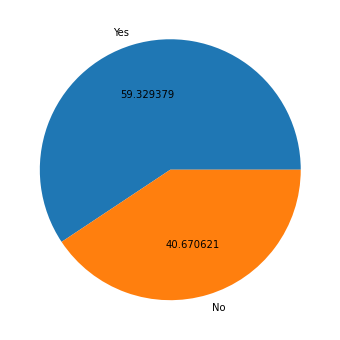

In [43]:
plt.figure(figsize = (6,6))
plt.pie(df['online_order'].value_counts(),labels =df['online_order'].unique(), autopct='%f')
plt.show()

### Insight:

* Above 59% of restaurents are provided online order facility and above 40% of restaurents are not provided online order facility.

### Check Book Table Facility

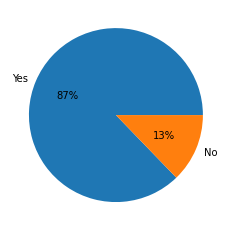

In [44]:
plt.pie(df['book_table'].value_counts(), labels =df['book_table'].unique(), autopct='%.0f%%' )
plt.show()

### Insight:

* 87% of restaurents are provided book table facility and above 40% of restaurents are not provided book table facility.

### Resturants are having both online and table booking

Number of resturant having both online and table booking is 3756


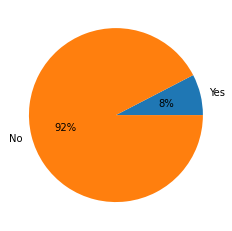

In [45]:
online_y_table = df.query('online_order=="Yes" & book_table == "Yes"')
print('Number of resturant having both online and table booking is',online_y_table.shape[0])

plt.pie([online_y_table.shape[0], df.shape[0] - online_y_table.shape[0]], labels=['Yes','No'], autopct='%.f%%')
plt.show()

### Insights:

* only 13% of restaurents are provided both online order and book table facility and 92% of restaurents are not provided both online order and book table facility.

### Types of resturants available and their numbers

<BarContainer object of 10 artists>

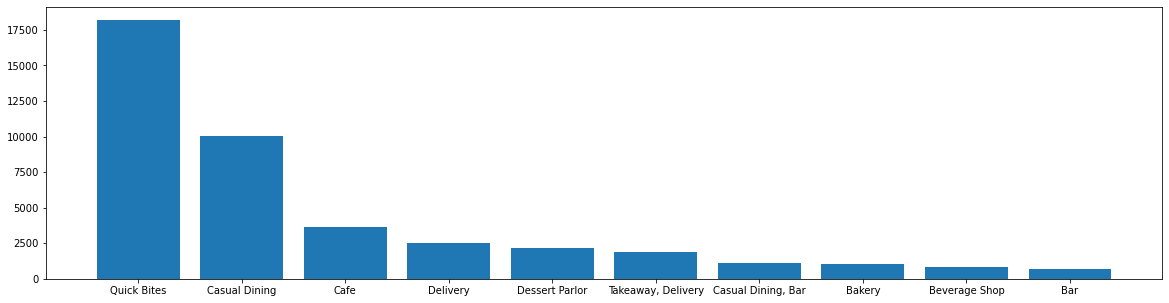

In [46]:
plt.figure(figsize=(20,5))
rest_catag = df[['rest_type','name']].groupby('rest_type').count()
rest_catag = rest_catag.reset_index()
rest_catag = rest_catag.sort_values(by ='name',ascending=False)
plt.bar(x=rest_catag['rest_type'][0:10], height=rest_catag['name'][0:10])

### Insight:

* Quick Bites types of restaurents are most present and followed by Casual Dining, cafe, Delivery as so on.

### Top 20 costliest resturants

In [47]:
costliest = df.sort_values(by='cost',ascending=False)
costliest = costliest[['location','name']]
costliest.iloc[:20]

,location,name
19139,Old Airport Road,Le Cirque Signature - The Leela Palace
45618,Old Airport Road,Le Cirque Signature - The Leela Palace
40266,Sankey Road,Royal Afghan - ITC Windsor
41591,Marathahalli,Malties - Radisson Blu
42141,Marathahalli,Malties - Radisson Blu
39125,Sankey Road,La Brasserie - Le Meridien
40262,Sankey Road,La Brasserie - Le Meridien
39416,Sankey Road,La Brasserie - Le Meridien
37715,Sankey Road,La Brasserie - Le Meridien
45611,Old Airport Road,Jamavar - The Leela Palace


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cost', ylabel='Density'>

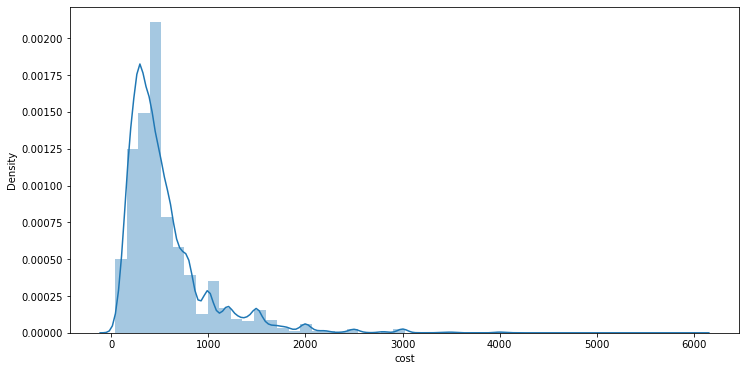

In [48]:
plt.figure(figsize = (12,6))
sns.distplot(df['cost'])

### Insight:

* Le Cirque Signature - The Leela Palace, Royal Afghan - ITC Windsor and Malties - Radisson Blu are the Top 3 costliest Restaurents in the location.

### Resturants with rating 

In [49]:
# Dictionary is created for different ratings

Resturant_rating = {}
Resturant_rating['1 to 2'] = df[df['rate'] < 2 ].shape[0]
Resturant_rating['2 to 3'] = df[(df['rate'] < 3) & (df['rate'] > 2) ].shape[0]
Resturant_rating['3 to 4'] = df[(df['rate'] < 4) & (df['rate'] > 3) ].shape[0]
Resturant_rating['4 to 5'] = df[(df['rate'] < 5) & (df['rate'] > 4) ].shape[0]

In [50]:
Resturant_rating

{'1 to 2': 5, '2 to 3': 2241, '3 to 4': 33716, '4 to 5': 9210}

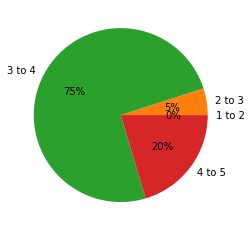

In [51]:
plt.pie(Resturant_rating.values(), labels =Resturant_rating.keys(), autopct = '%.f%%')
plt.show()

### Insight:

* Ratings are provided by Customer: 75% rating are in between 3-4, 20% rating are in between 4-5 and 5% rating are in between 2-3.

### Different cusines resturants available

In [52]:
import re

df.index=range(df.shape[0])
cusine=set()
for i in range(df.shape[0]):
    array_split=re.split(',',df['cuisines'][i])
    for item in array_split:
        cusine.add(item.strip())
print(cusine)

{'Mithai', 'Goan', 'Kerala', 'Bar Food', 'Mexican', 'Andhra', 'Afghan', 'Raw Meats', 'South Indian', 'Chettinad', 'Italian', 'Bengali', 'Drinks Only', 'Chinese', 'Tamil', 'African', 'French', 'Sindhi', 'Biryani', 'Thai', 'Charcoal Chicken', 'Ice Cream', 'Paan', 'Lucknowi', 'Spanish', 'European', 'Cantonese', 'Afghani', 'Assamese', 'North Indian', 'Belgian', 'Mughlai', 'BBQ', 'Malaysian', 'Finger Food', 'Maharashtrian', 'Bakery', 'Burmese', 'Modern Indian', 'Mangalorean', 'Indonesian', 'Mediterranean', 'Rajasthani', 'Sri Lankan', 'Salad', 'Coffee', 'Greek', 'Asian', 'Portuguese', 'Momos', 'British', 'Lebanese', 'American', 'Tea', 'Hyderabadi', 'Nepalese', 'Mongolian', 'German', 'Parsi', 'Oriya', 'Bubble Tea', 'Healthy Food', 'Desserts', 'Japanese', 'Vietnamese', 'Singaporean', 'Hot dogs', 'Vegan', 'Sandwich', 'Wraps', 'Beverages', 'Grill', 'Bohri', 'Fast Food', 'Iranian', 'Turkish', 'Korean', 'Rolls', 'Konkan', 'Steak', 'Tex-Mex', 'Tibetan', 'Jewish', 'Street Food', 'Juices', 'Pizza', '

### Fininding most liked dishes

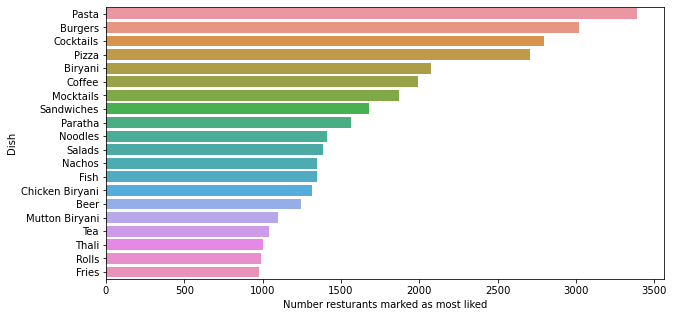

In [53]:
mostliked = []

for i in range(df.shape[0]):
    if df['dish_liked'][i] != 'No Special Dish':
        array_split=re.split(',',df['dish_liked'][i])
        for item in array_split:
            mostliked.append(item.strip())
    else:
        continue

mostliked_ser = pd.Series(mostliked)
plt.figure(figsize=(10,5))
sns.barplot(y=mostliked_ser.value_counts()[0:20].index, x=mostliked_ser.value_counts()[0:20])
plt.xlabel('Number resturants marked as most liked')
plt.ylabel('Dish')
plt.show()

### Insight:

* Pasta is the most liked dish among other dishes and Burger, Cocktails, Pizza are followed and so on.

### Visualizing online order vs rate (means rating)

In [54]:
pd.crosstab(df.online_order, df.rate)

rate,1.8,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,...,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9
online_order,,,,,,,,,,,,,,,,,,,,,
No,5,11,9,10,29,36,38,83,141,224,...,874,842,648,691,374,297,140,113,34,12
Yes,0,0,15,16,22,34,63,177,166,376,...,2308,2103,1535,1000,773,359,160,54,32,43


In [55]:
Y = pd.crosstab(df.online_order, df.rate)
Y.sum(1).astype(float)

online_order
No     20086.0
Yes    29301.0
dtype: float64

Text(0.5, 1.0, 'Online Order vs Rate(Rating)')

<Figure size 864x432 with 0 Axes>

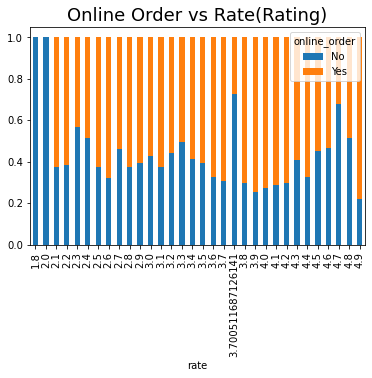

In [56]:
plt.figure(figsize = (12,6))
Y = pd.crosstab(df.rate, df.online_order)
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Online Order vs Rate(Rating)', fontsize = 18)

### Insight:

* The Ratings are varying in between 2.1 to 4.9 during online order from restaurents.

### Visualizing book table vs rate (means rating)

Text(0.5, 1.0, 'Book_table vs Rate(Rating)')

<Figure size 864x432 with 0 Axes>

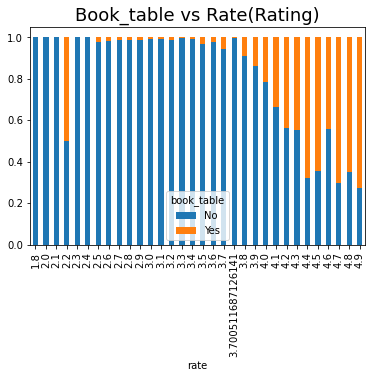

In [57]:
plt.figure(figsize = (12,6))
Y = pd.crosstab(df.rate, df.book_table)
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Book_table vs Rate(Rating)', fontsize = 18)

### Insight:

* Most of the Rating above 4 while taking the Book table facility in the restaurents.

### Visualize online order falility, location wise

In [58]:
df1 = df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(data = df1, values = None, index = ['location'], columns = ['online_order'], aggfunc = 'sum', fill_value = None)
df1

name        
online_order           No     Yes
location                         
BTM                1650.0  3152.0
Banashankari        362.0   483.0
Banaswadi           308.0   333.0
Bannerghatta Road   657.0   882.0
Basavanagudi        219.0   432.0
...                   ...     ...
West Bangalore        2.0     2.0
Whitefield          956.0  1076.0
Wilson Garden        98.0   132.0
Yelahanka             1.0     5.0
Yeshwantpur          26.0    93.0

[93 rows x 2 columns]

<AxesSubplot:xlabel='location'>

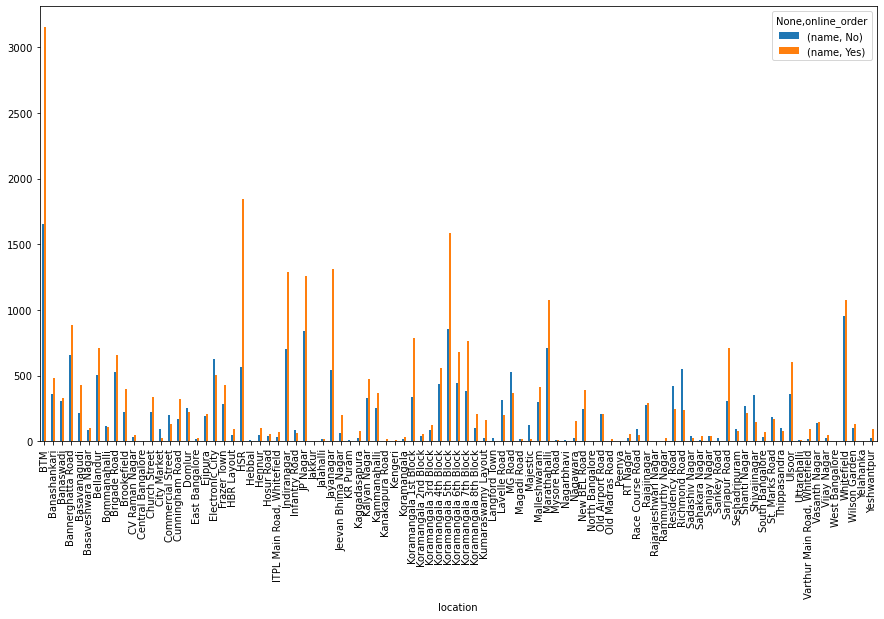

In [59]:
df1.plot(kind = 'bar', figsize = (15,8))

### Insight:

* BTM location is the highest both for online order provided and also online order not provided by the restaurents.

### Visualize book table falility, location wise

In [60]:
df2 = df.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2 = pd.read_csv('location_booktable.csv')
df2 = pd.pivot_table(data = df2, values = None, index = ['location'], columns = ['book_table'], aggfunc = np.sum, fill_value = None)
df2

name       
book_table             No    Yes
location                        
BTM                4646.0  156.0
Banashankari        790.0   55.0
Banaswadi           633.0    8.0
Bannerghatta Road  1440.0   99.0
Basavanagudi        635.0   16.0
...                   ...    ...
West Bangalore        4.0    NaN
Whitefield         1780.0  252.0
Wilson Garden       225.0    5.0
Yelahanka             6.0    NaN
Yeshwantpur         117.0    2.0

[93 rows x 2 columns]

<AxesSubplot:xlabel='location'>

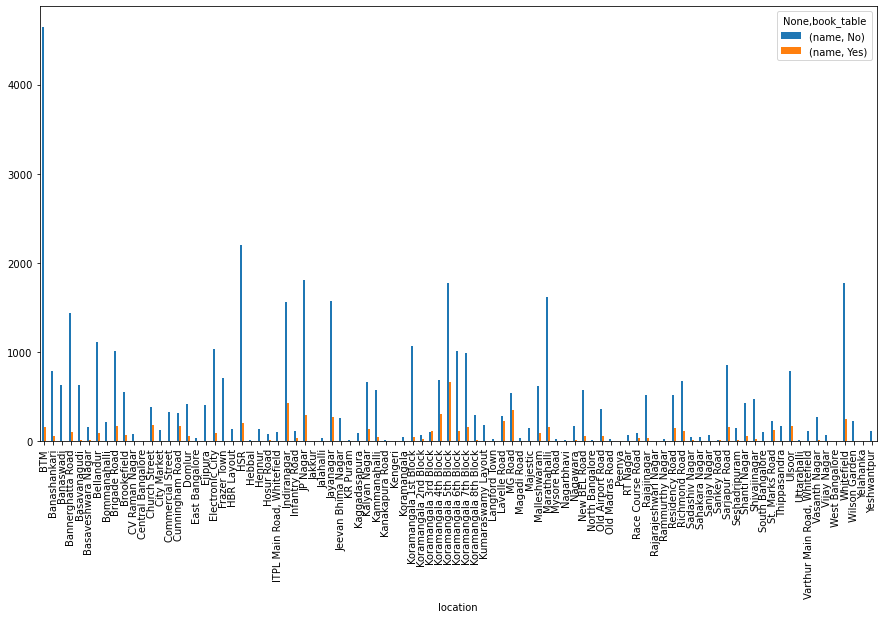

In [61]:
df2.plot(kind = 'bar', figsize = (15,8))

### Insight:

* BTM location is highest for Book table facility provided and Koramangala 5th Bolck location is highest for not provided book table facility.

### Grouping types of restaurents, location wise

In [62]:
df3 = df.groupby(['location', 'Type'])['name'].count()
df3.to_csv('location_Type.csv')
df3 = pd.read_csv('location_Type.csv')
df3 = pd.pivot_table(data = df3, values = None, index = ['location'], columns = ['Type'], aggfunc = np.sum, fill_value = None)
df3

name                                                      \
Type              Buffet Cafes Delivery Desserts Dine-out Drinks & nightlife   
location                                                                       
BTM                 26.0  81.0   2894.0    200.0   1563.0               22.0   
Banashankari         7.0  36.0    387.0     66.0    335.0               14.0   
Banaswadi            NaN  24.0    309.0     37.0    264.0                6.0   
Bannerghatta Road    9.0  42.0    798.0    131.0    548.0                9.0   
Basavanagudi         7.0  11.0    334.0     63.0    231.0                5.0   
...                  ...   ...      ...      ...      ...                ...   
West Bangalore       NaN   NaN      4.0      NaN      NaN                NaN   
Whitefield          27.0  48.0   1005.0    128.0    744.0               47.0   
Wilson Garden        3.0   NaN    127.0     16.0     81.0                2.0   
Yelahanka            NaN   NaN      4.0      NaN      2.0                NaN   
Yeshwantpur          1.0   NaN     88.0      3.0     25.0                1.0   

                                 
Type              Pubs and bars  
location                         
BTM                        16.0  
Banashankari                NaN  
Banaswadi                   1.0  
Bannerghatta Road           2.0  
Basavanagudi                NaN  
...                         ...  
West Bangalore              NaN  
Whitefield                 33.0  
Wilson Garden               1.0  
Yelahanka                   NaN  
Yeshwantpur                 1.0  

[93 rows x 7 columns]

<AxesSubplot:xlabel='location'>

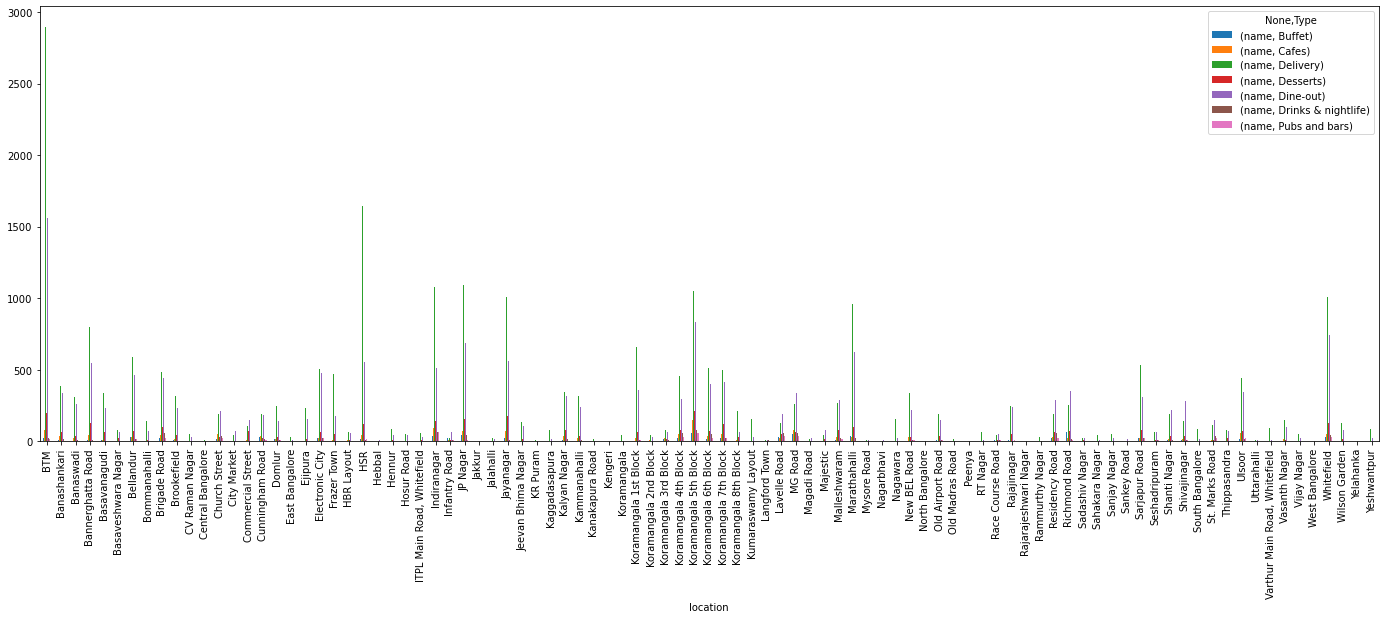

In [63]:
df3.plot(kind = 'bar', figsize = (24,8))

### No. of Votes, Location Wise

In [64]:
df4 = df.groupby(['location'])['votes'].sum()
df4 = df4.to_frame()
df4 = df4.sort_values('votes', ascending = False)
df4.head()

,votes
location,
Koramangala 5th Block,2219495
Indiranagar,1195307
Koramangala 4th Block,685156
BTM,618986
Church Street,594979


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


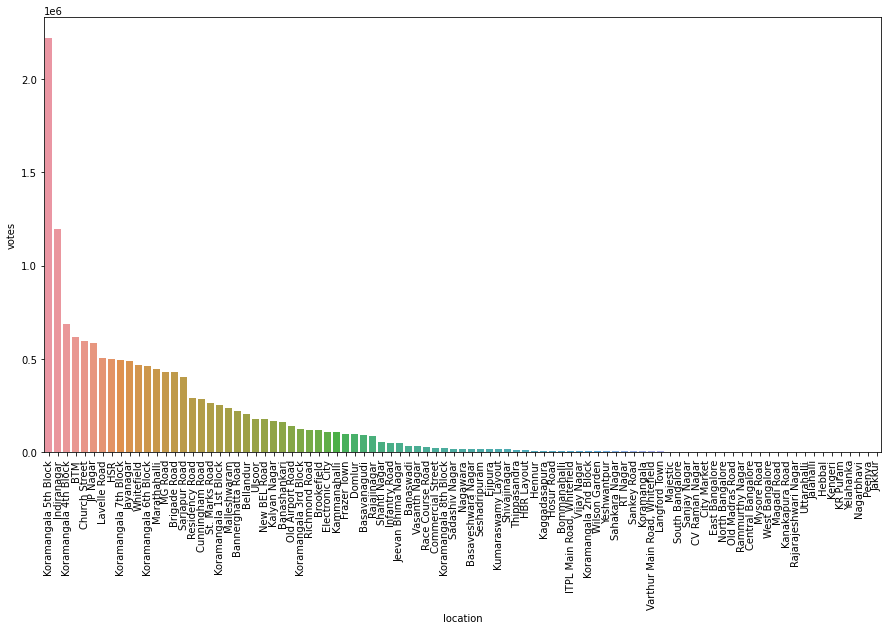

In [65]:
plt.figure(figsize = (15,8))
sns.barplot(df4.index, df4['votes'])
plt.xticks(rotation = 90);

### Insight:

* Koramangala 5th Bolck is the highest for maximum Votes received by the customers. Indiranagar, Koramangala 4th Bolck, BTM are followed and so on.

### Visualizing Top Cuisines based on Votes

In [66]:
df5 = df[['cuisines', 'votes']]
df5.drop_duplicates()
df5 = df5.groupby(['cuisines'])['votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values(by = 'votes', ascending = False)
df5.head()

,votes
cuisines,
North Indian,559885
"Pizza, Cafe, Italian",347520
"Cafe, American, Burger, Steak",301059
"North Indian, Chinese",259502
"North Indian, Mughlai, South Indian, Chinese",227930


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


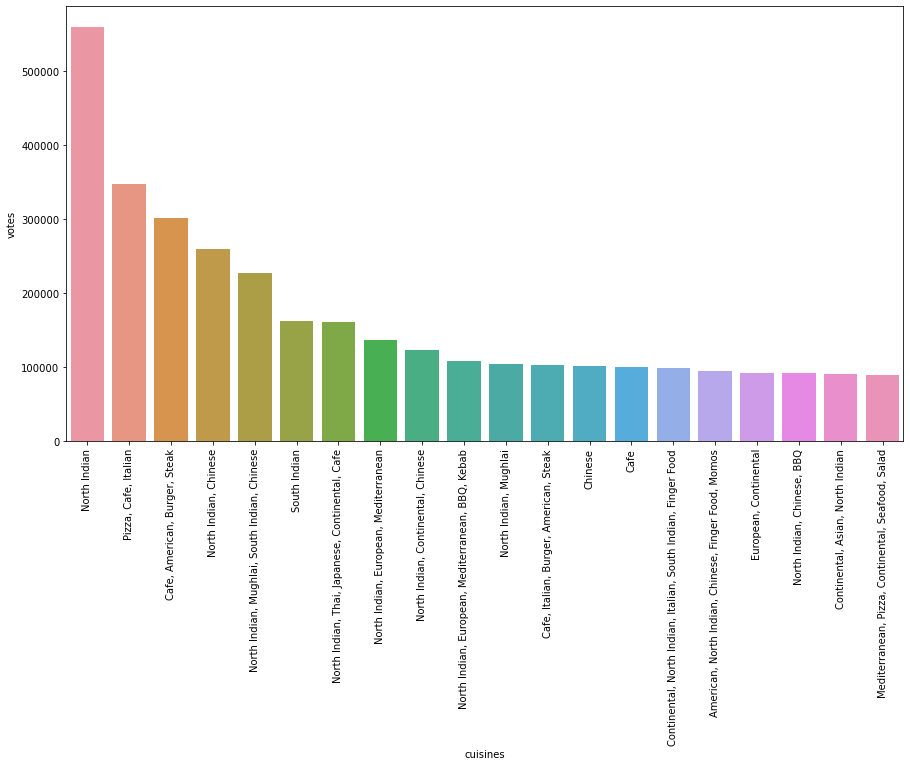

In [67]:
plt.figure(figsize = (15,8))
sns.barplot(df5.index[0:20], df5['votes'][0:20])
plt.xticks(rotation = 90);

### Insight:

* North Indian is the best Cuisines based on Votes given by the customers.